In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.4.1'

Let's load the Fashion MNIST dataset from Keras:

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

Our training set consists of 60000 greyscale images (each pixel is an integer that ranges from 0 to 255), size 28x28.

In [5]:
print(X_train_full.shape)
print(y_train_full.shape)
X_train_full.dtype

(60000, 28, 28)
(60000,)


dtype('uint8')

Our test set consists of 10000 greyscale images (each pixel is an integer that ranges from 0 to 255), size 28x28.

In [6]:
print(X_test.shape)
print(y_test.shape)
X_test.dtype

(10000, 28, 28)
(10000,)


dtype('uint8')

As a best practice, it is important to create a validation set (we already have a training set and a test set). Also we are going to scale the input features (each pixel divided by 255.0) in order to use gradient descent properly.

In [7]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

Let's visualize one example of the training set:

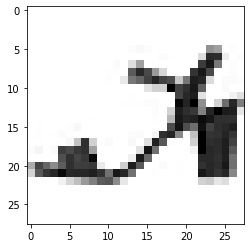

In [15]:
plt.imshow(X_train[30], cmap='binary')

Let's initialize a list of class names for MNIST (details of the dataset available via google):

In [8]:
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Boot"]

Now let's define our architecture by passing a list of layers to the Sequential model:

In [9]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Note: the Flatten() layer computes X.reshape(-1, 28*28)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


List of layers:

In [11]:
model.layers

Let's compile our model using a multi-label loss function: 'sparse_categorical_crossentropy' (as the classes are not one-hot-encoded). We are using a Stochastic Gradient Descent  with a default learning rate lr=0.01 to optimize 'accuracy' of our model:

In [12]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

Let's train our model on 30 epochs and pass 'validation_data' on which Keras will measure the loss and metrics at the end of each epoch. The model will not train on validation data. This validation set is not affected by optional regularization layers.

In [14]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 1.0067 - accuracy: 0.6912 - val_loss: 0.5209 - val_accuracy: 0.8174
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5015 - accuracy: 0.8251 - val_loss: 0.4461 - val_accuracy: 0.8454
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4564 - accuracy: 0.8387 - val_loss: 0.4118 - val_accuracy: 0.8598
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4184 - accuracy: 0.8529 - val_loss: 0.3927 - val_accuracy: 0.8642
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4000 - accuracy: 0.8607 - val_loss: 0.3830 - val_accuracy: 0.8666
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3817 - accuracy: 0.8640 - val_loss: 0.3607 - val_accuracy: 0.8764
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3674 - accuracy: 0.8673 - val_loss: 0.3702 - val_accuracy: